<a href="https://colab.research.google.com/github/baroneleonardo/Applied-Statistics/blob/main/CleanData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go

In [5]:
data = pd.read_csv("datass/dataset.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [14]:
# Rimuovi le righe in base alle condizioni specificate
data = data[(data['Education_Level'] != 'Unknown') & (data['Income_Category'] != 'Unknown') & (data['Marital_Status'] != 'Unknown')]

In [15]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.999940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,0.000038,0.999960
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,0.000148,0.999850
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7081 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           7081 non-null   int64  
 1   Attrition_Flag                                                                                                                      7081 non-null   object 
 2   Customer_Age                                                                                                                        7081 non-null   int64  
 3   Gender                                                                                 

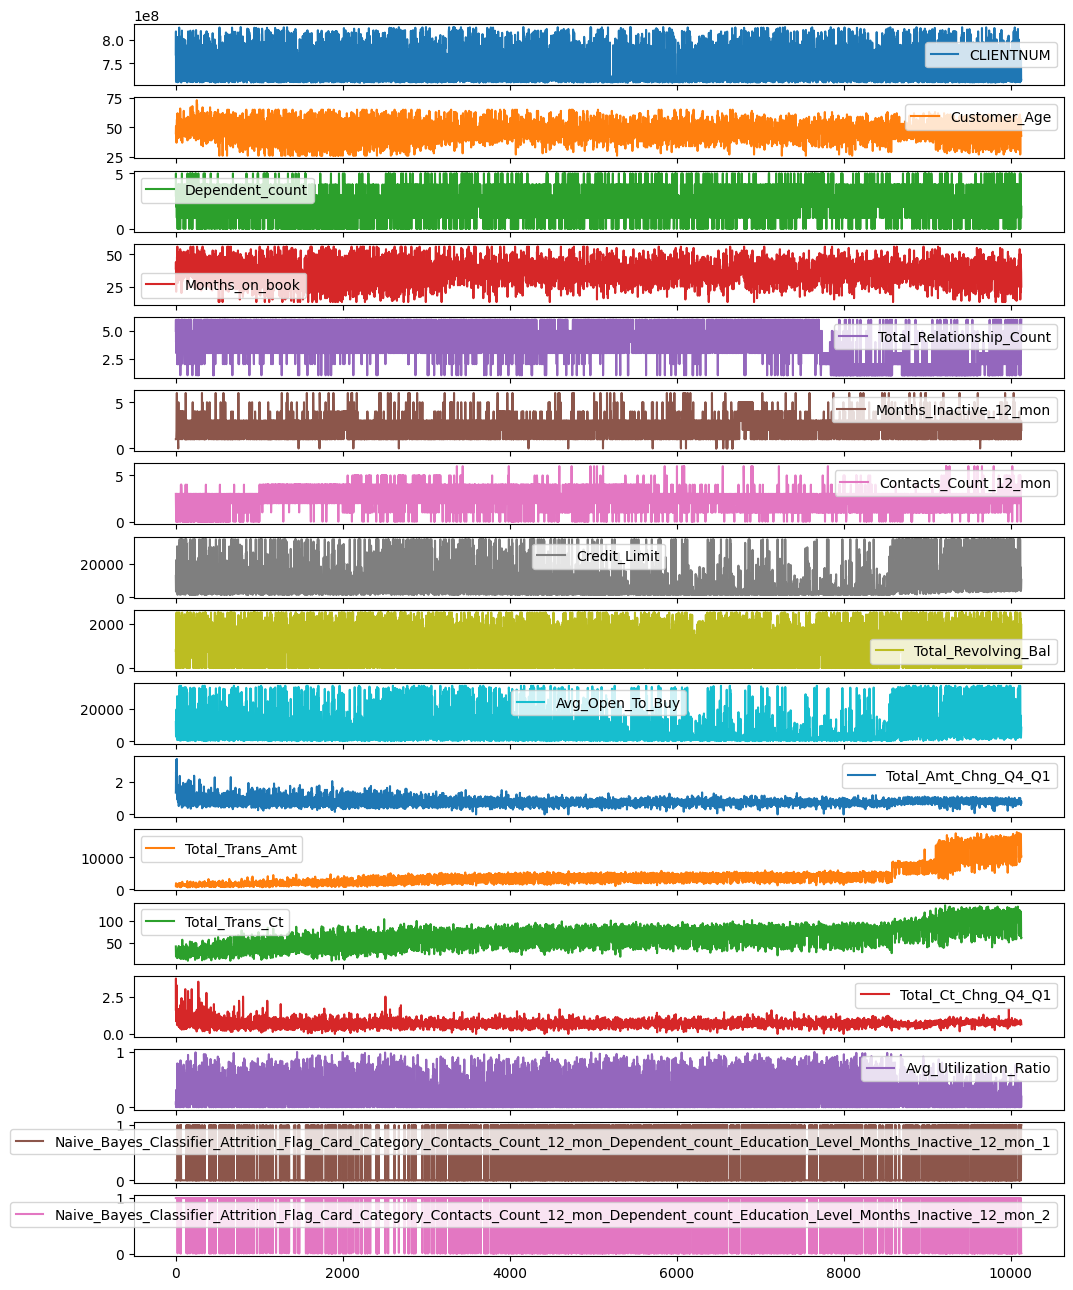

In [17]:
data.plot(subplots=True, figsize=(12, 16))
plt.show()

In [18]:
data['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
Existing Customer    0.842819
Attrited Customer    0.157181
Name: proportion, dtype: float64

In [19]:
data_agg = data.groupby(['Attrition_Flag'])['CLIENTNUM'].count().to_frame().reset_index()
data_agg
labels = data_agg.Attrition_Flag
values = data_agg.CLIENTNUM

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])
fig

In [20]:
data_agg = data.groupby(['Income_Category'])['CLIENTNUM'].count().to_frame().reset_index()
data_agg
labels = data_agg.Income_Category
values = data_agg.CLIENTNUM

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])
fig

In [21]:
data.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'NB1'}, inplace=True)
data.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NB2'}, inplace=True)

In [ ]:
# Bisogna Capire come gestire queste variabili

# Trasformare la variabile in categorica (0;1)
data['Income_Category'] =  data['Income_Category'].map({'Unknown':1,
                                                'Less than $40K':1,
                                                '$40K - $60':2,
                                                '$60K - $80K':3,
                                                '$80K - $120K':4, 
                                                '$120K +':5})
data['Attrition_Flag'] = data.Attrition_Flag.map({'Attrited Customer': 1,
                                               'Existing Customer': 0})
data['Gender'] = data.Gender.map({'M': 0,'F': 1})
data['Education_Level'] = data.Education_Level.map({'Uneducated':0, 
                                                    'High School':1,
                                                    'College':2,
                                                    'Graduate':3,
                                                    'Post-Graduate':4,
                                                    'Doctorate':5
                                                    })
data['Marital_Status'] = data.Marital_Status.map({'Single':0,
                                                  'Married':1,
                                                  'Unknown':0, 
                                                  'Divorced':3})
data['Card_Category'] = data.Card_Category.map({'Blue':0,
                                                'Silver':1})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7081 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 7081 non-null   int64  
 1   Attrition_Flag            7081 non-null   int64  
 2   Customer_Age              7081 non-null   int64  
 3   Gender                    7081 non-null   int64  
 4   Dependent_count           7081 non-null   int64  
 5   Education_Level           7081 non-null   int64  
 6   Marital_Status            7081 non-null   int64  
 7   Income_Category           5669 non-null   float64
 8   Card_Category             6989 non-null   float64
 9   Months_on_book            7081 non-null   int64  
 10  Total_Relationship_Count  7081 non-null   int64  
 11  Months_Inactive_12_mon    7081 non-null   int64  
 12  Contacts_Count_12_mon     7081 non-null   int64  
 13  Credit_Limit              7081 non-null   float64
 14  Total_Revolv

In [ ]:
data = data.dropna()

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB1,NB2
0,768805383,0,45,0,3,1,1,3.0,0.0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,0,49,1,5,3,0,1.0,0.0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,0,51,0,3,3,1,4.0,0.0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
4,709106358,0,40,0,3,0,1,3.0,0.0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
8,710930508,0,37,0,3,0,0,3.0,0.0,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996


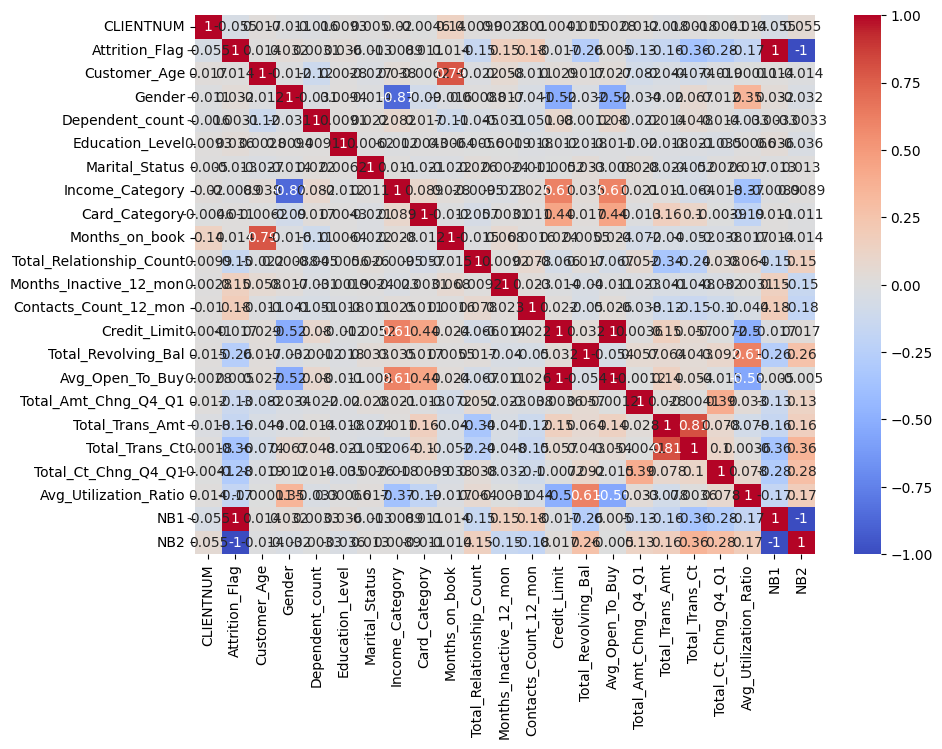

In [ ]:
correlations = data.corr()
# Heat map
plt.figure(figsize=(10, 7))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
data.to_csv('DataGood.csv', index=False)